In [1]:
from shapely.geometry import Point, Polygon
import pandas as pd
import geopandas as gpd

from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point

proj_wgs84 = pyproj.Proj('+proj=longlat +datum=WGS84')


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return Polygon(transform(project, buf).exterior.coords[:])

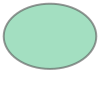

In [2]:
# Example
b = geodesic_point_buffer(45.4, -75.7, 1)
b

In [3]:
type(b)

shapely.geometry.polygon.Polygon

In [4]:
poly=Polygon(b)

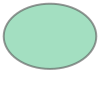

In [5]:
poly

In [6]:
type(b)

shapely.geometry.polygon.Polygon

In [7]:
import pandas as pd
lat_long_file=pd.read_excel("latlong.xls")
lat_long_file.dropna(inplace=True)

In [8]:
lat_long_file.reset_index(inplace=True)

In [9]:
lat_long_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      3895 non-null   int64  
 1   Name       3895 non-null   object 
 2   district   3895 non-null   object 
 3   state      3895 non-null   object 
 4   Lattitude  3895 non-null   float64
 5   Longitude  3895 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 182.7+ KB


In [10]:
lat_long_file['index'] = lat_long_file['index'].astype(str)

In [11]:
polygon_1=[]
for i in range(0,len(lat_long_file["Lattitude"]),1):
     polygon_1.append(geodesic_point_buffer(lat_long_file["Lattitude"][i], lat_long_file["Longitude"][i], 1))

lat_long_file["polygon_1"]=polygon_1
lat_long_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      3895 non-null   object 
 1   Name       3895 non-null   object 
 2   district   3895 non-null   object 
 3   state      3895 non-null   object 
 4   Lattitude  3895 non-null   float64
 5   Longitude  3895 non-null   float64
 6   polygon_1  3895 non-null   object 
dtypes: float64(2), object(5)
memory usage: 213.1+ KB


In [12]:
print(type(lat_long_file["polygon_1"].iloc[3]))

<class 'shapely.geometry.polygon.Polygon'>


In [13]:
lat_long_file["geometry"]=""
for i in range(len(lat_long_file)):
     lat_long_file["geometry"][i]=Polygon(polygon_1[i])

C:\Users\HRITIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
type(lat_long_file["geometry"])

pandas.core.series.Series

In [15]:
lat_long_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      3895 non-null   object 
 1   Name       3895 non-null   object 
 2   district   3895 non-null   object 
 3   state      3895 non-null   object 
 4   Lattitude  3895 non-null   float64
 5   Longitude  3895 non-null   float64
 6   polygon_1  3895 non-null   object 
 7   geometry   3895 non-null   object 
dtypes: float64(2), object(6)
memory usage: 243.6+ KB


In [16]:
lat_long_gdp = gpd.GeoDataFrame(lat_long_file)

In [17]:
lat_long_gdp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      3895 non-null   object  
 1   Name       3895 non-null   object  
 2   district   3895 non-null   object  
 3   state      3895 non-null   object  
 4   Lattitude  3895 non-null   float64 
 5   Longitude  3895 non-null   float64 
 6   polygon_1  3895 non-null   object  
 7   geometry   3895 non-null   geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 243.6+ KB


In [18]:
type(lat_long_gdp["geometry"])

geopandas.geoseries.GeoSeries

In [19]:
lat_long_gdp[["Lattitude","Longitude"]]=lat_long_gdp[["Lattitude","Longitude"]].astype(str)

In [20]:
lat_long_gdp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      3895 non-null   object  
 1   Name       3895 non-null   object  
 2   district   3895 non-null   object  
 3   state      3895 non-null   object  
 4   Lattitude  3895 non-null   object  
 5   Longitude  3895 non-null   object  
 6   polygon_1  3895 non-null   object  
 7   geometry   3895 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 243.6+ KB


In [21]:
lat_long_gdp.drop(["polygon_1"], axis=1, inplace=True)

In [22]:
lat_long_buffer_shp = gpd.GeoDataFrame(lat_long_gdp, geometry=lat_long_gdp.geometry)

In [23]:
lat_long_buffer_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   index      3895 non-null   object  
 1   Name       3895 non-null   object  
 2   district   3895 non-null   object  
 3   state      3895 non-null   object  
 4   Lattitude  3895 non-null   object  
 5   Longitude  3895 non-null   object  
 6   geometry   3895 non-null   geometry
dtypes: geometry(1), object(6)
memory usage: 213.1+ KB


In [24]:
lat_long_buffer_shp["geometry"].area

0       0.000266
1       0.000266
2       0.000266
3       0.000266
4       0.000265
          ...   
3890    0.000276
3891    0.000277
3892    0.000276
3893    0.000277
3894    0.000276
Length: 3895, dtype: float64

In [27]:
lat_long_buffer_shp=lat_long_buffer_shp[["index","geometry"]]

In [28]:
lat_long_buffer_shp.to_file("lat_long_buffer_shp.shp")

In [29]:
lat_long_gdp

,index,Name,district,state,Lattitude,Longitude,geometry
0,0,స్వర్గపురి,east godavari,AP,17.1975324,82.2273254,"POLYGON ((82.23673 17.19753, 82.23668 17.19665..."
1,1,Smashanam,east godavari,AP,16.5723151,81.9666197,"POLYGON ((81.97599 16.57231, 81.97594 16.57143..."
2,2,Hindu Burial Ground,east godavari,AP,16.8680309,81.9457228999999,"POLYGON ((81.95511 16.86803, 81.95506 16.86714..."
3,3,Burial Ground komaripalem,east godavari,AP,16.9240669,81.9988863,"POLYGON ((82.00827 16.92407, 82.00823 16.92318..."
4,4,crimition Elamanchili,east godavari,AP,16.4777473,81.8002815,"POLYGON ((81.80965 16.47775, 81.80960 16.47686..."
...,...,...,...,...,...,...,...
3890,3894,Rasuldih Basti Qabristan قبرستان رسولڈی بستی,PURULIYA,WB,23.1040285,86.1566134,"POLYGON ((86.16637 23.10403, 86.16633 23.10314..."
3891,3895,Chandaha Kabristan,PURULIYA,WB,23.3470571,86.3685331,"POLYGON ((86.37831 23.34706, 86.37827 23.34617..."
3892,3896,Bagjobra Qabristaan قبرستان بگجوبڑا,PURULIYA,WB,23.0912663,86.1629155999999,"POLYGON ((86.17268 23.09127, 86.17263 23.09038..."
3893,3897,cemetery,PURULIYA,WB,23.3470571,86.3685331,"POLYGON ((86.37831 23.34706, 86.37827 23.34617..."


In [30]:
lat_long_buffer_shp

,index,geometry
0,0,"POLYGON ((82.23673 17.19753, 82.23668 17.19665..."
1,1,"POLYGON ((81.97599 16.57231, 81.97594 16.57143..."
2,2,"POLYGON ((81.95511 16.86803, 81.95506 16.86714..."
3,3,"POLYGON ((82.00827 16.92407, 82.00823 16.92318..."
4,4,"POLYGON ((81.80965 16.47775, 81.80960 16.47686..."
...,...,...
3890,3894,"POLYGON ((86.16637 23.10403, 86.16633 23.10314..."
3891,3895,"POLYGON ((86.37831 23.34706, 86.37827 23.34617..."
3892,3896,"POLYGON ((86.17268 23.09127, 86.17263 23.09038..."
3893,3897,"POLYGON ((86.37831 23.34706, 86.37827 23.34617..."
